# Stores Locations Installation Problem 

In [1]:
from amplpy import AMPL, Environment
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Ask for the AMPL folder path
amplUserFolder = input("path of the AMPL folder: ")

path of the AMPL folder: /Users/andreabosisio/Library/CloudStorage/OneDrive-PolitecnicodiMilano/MAGISTRALE/F. OPERATIONS RESEARCH/ampl_macos64


In [3]:
# Ask for the input data file
inputFilePath = input("path of the input file (.dat): ") or "inputs/minimart-I-50.dat"

path of the input file (.dat): 


In [4]:
# Create an AMPL instance
ampl = AMPL(Environment(amplUserFolder))

# Interpret the two files
ampl.read('minimart_sol.mod')
ampl.read_data(inputFilePath)

In [5]:
# Save parameters from the input file 
n = int(ampl.get_parameter('n').value()) #number of villages

coordX = ampl.get_parameter('Cx').get_values().toDict() #village coord x
coordY = ampl.get_parameter('Cy').get_values().toDict() #village coord y 
usable = ampl.get_parameter('usable').get_values().toDict() #village i can be used to build a store
dc = ampl.get_parameter('Dc').get_values().toDict() #cost to build a store in village i

rng = int(ampl.get_parameter('range').value()) 

distances = ampl.get_parameter('distance').get_values().to_dict() #distances from i to j
vc = ampl.get_parameter('Vc').value() #driving cost per kilometer 
fc = ampl.get_parameter('Fc').value() #fixed fee for each driver
capacity = int(ampl.get_parameter('capacity').value()) #capacity of each truck 

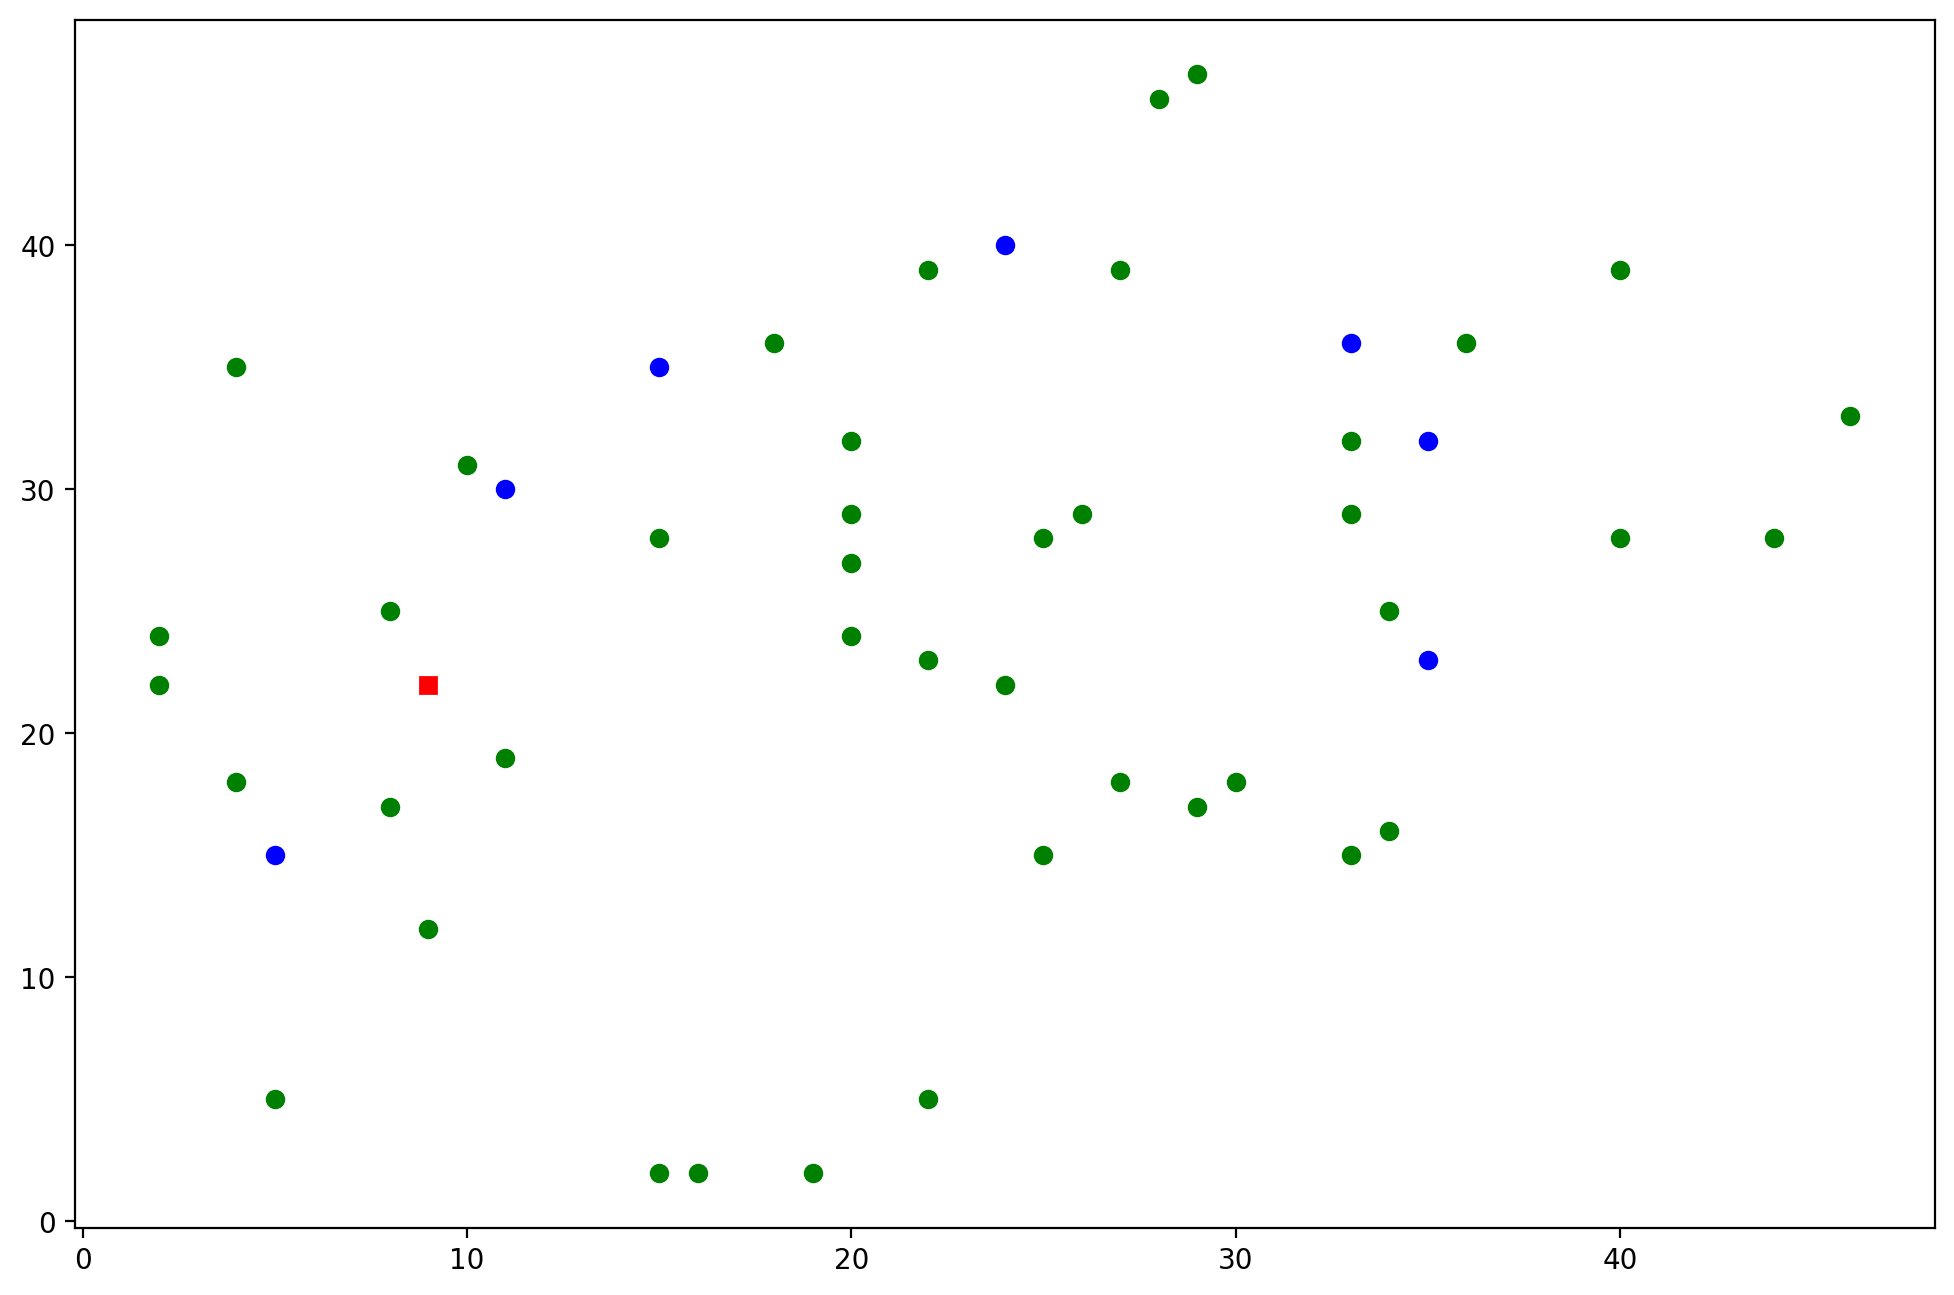

In [6]:
# Plot the region 
# red = depot, green = usable sites, blue = non usable sites
fig = plt.figure()
fig.set_size_inches(12,8)
fig.set_dpi(200)
plot = fig.add_subplot()
plot.plot(coordX.get(1), coordY.get(1), c='r',marker='s') #depot

usableCX = dict()
usableCY = dict()
nonUsableCX = dict()
nonUsableCY = dict()

for i in range(2,n+1):
    if usable.get(i)==1:
        usableCX.update({i: coordX.get(i)})
        usableCY.update({i: coordY.get(i)})
    else:    
        nonUsableCX.update({i: coordX.get(i)})
        nonUsableCY.update({i: coordY.get(i)})
        
plot.scatter(list(usableCX.values()), list(usableCY.values()), c='g') 
plot.scatter(list(nonUsableCX.values()), list(nonUsableCY.values()) , c='b') 

In [7]:
# Solve the store locations installation problem 
ampl.set_option('solver', amplUserFolder+"/cplex")
ampl.solve()

CPLEX 20.1.0.0: optimal integer solution; objective 65
0 MIP simplex iterations
0 branch-and-bound nodes


In [8]:
totalcost = ampl.get_objective('cost')
# Print it
print("Objective is:", totalcost.value())

Objective is: 65.0


In [9]:
y = ampl.get_variable('y').get_values().toDict()
ampl.close()

# Installed stores coordinates          
# Installed stores coordinates          
storesCoords = dict()

for i in range(1, len(y)+1):
    if y.get(i) == 1:
        storesCoords.update({i: (coordX.get(i), coordY.get(i))})
        
storesCoords

{1: (9.0, 22.0),
 2: (22.0, 5.0),
 9: (15.0, 2.0),
 10: (4.0, 18.0),
 12: (34.0, 25.0),
 14: (46.0, 33.0),
 16: (28.0, 46.0),
 22: (5.0, 5.0),
 24: (10.0, 31.0),
 36: (22.0, 39.0),
 40: (25.0, 28.0),
 42: (36.0, 36.0),
 43: (4.0, 35.0),
 45: (9.0, 12.0),
 50: (30.0, 18.0)}

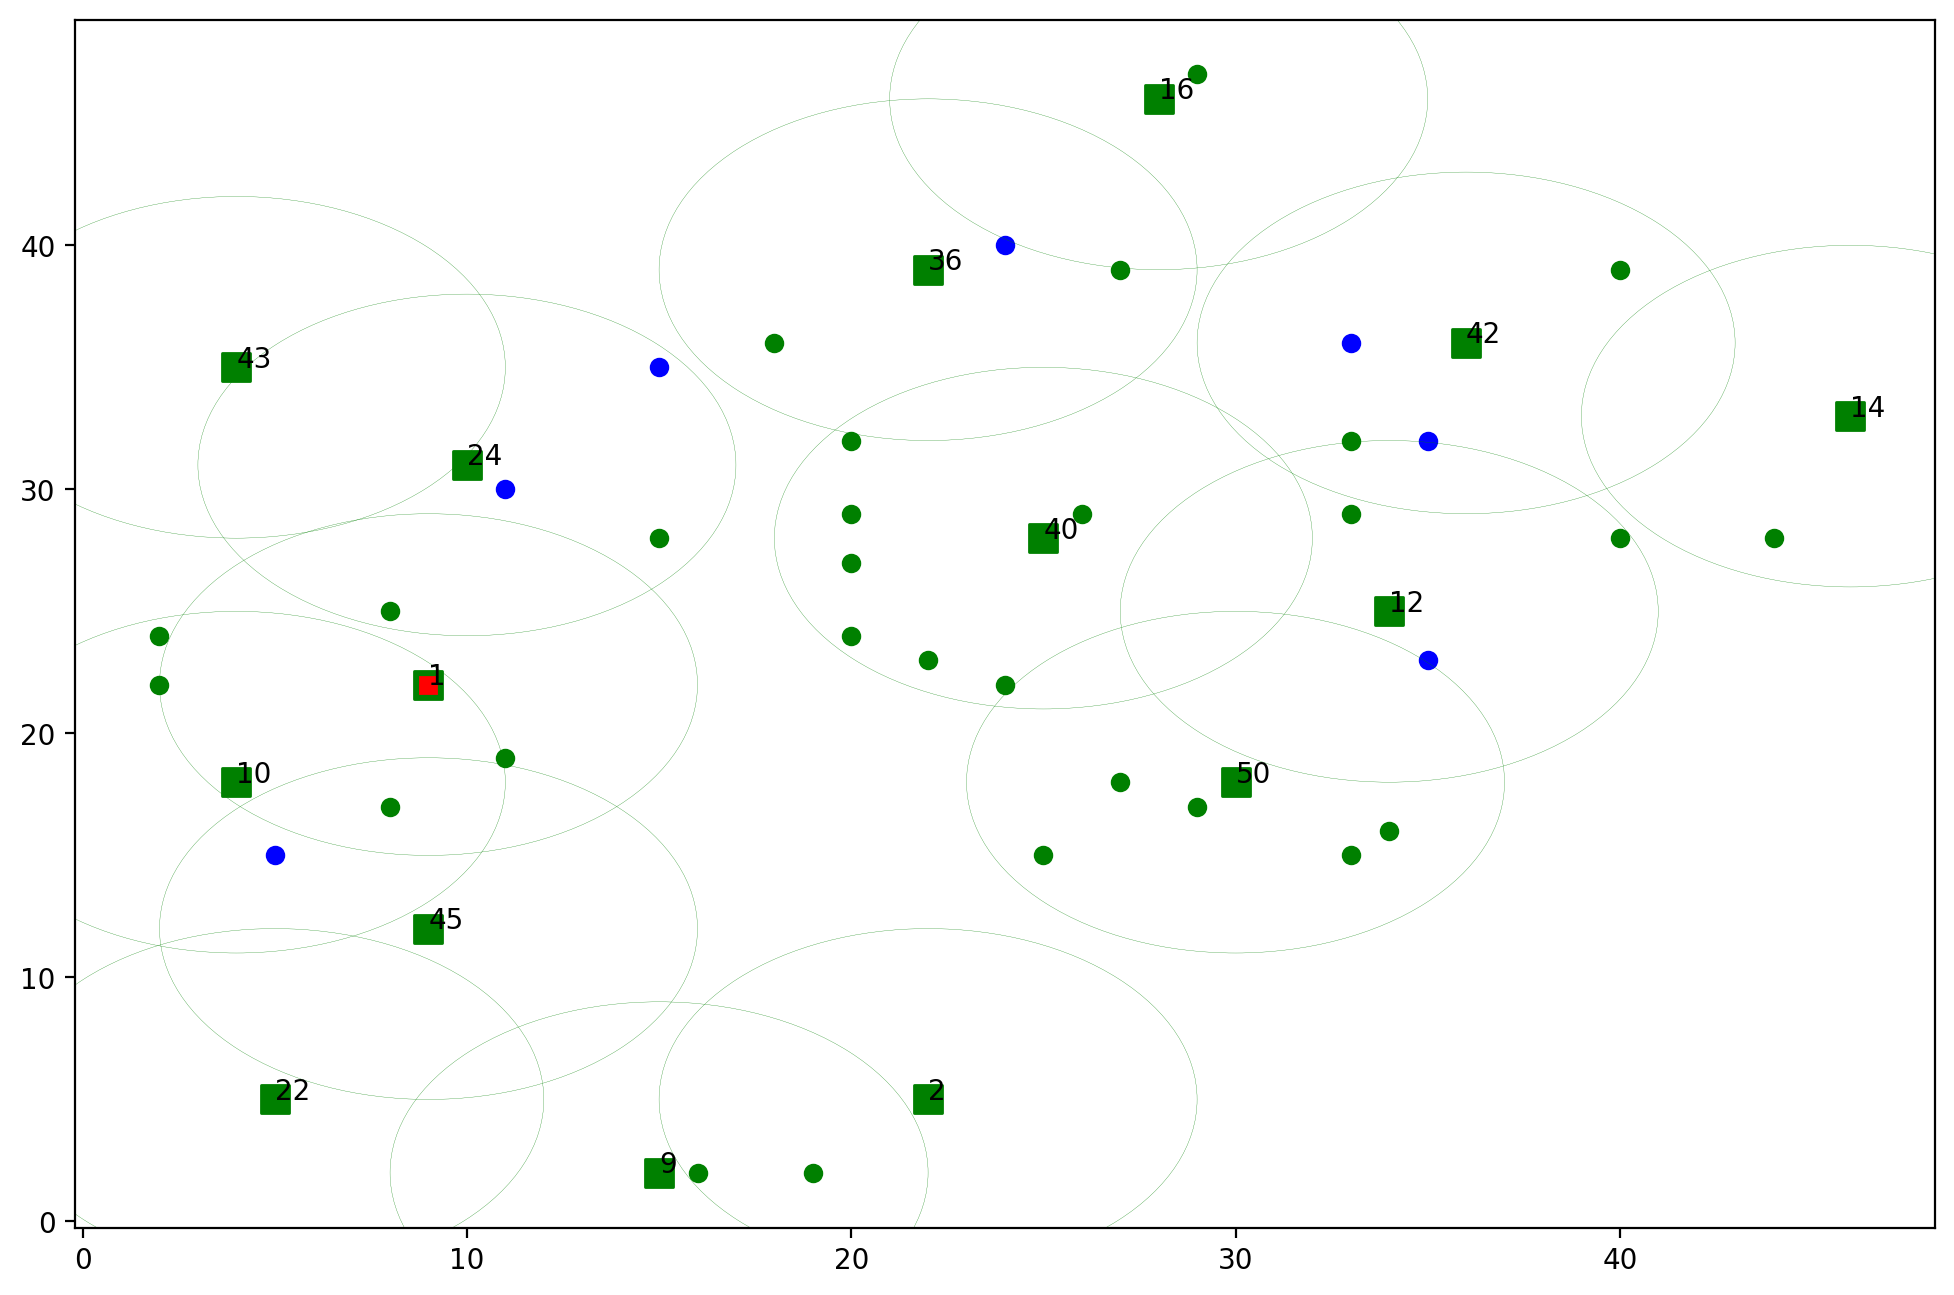

In [10]:
plot.scatter([c[0] for c in storesCoords.values()], [c[1] for c in storesCoords.values()], c='g', marker='s', s=100)
for c in storesCoords:
    plot.add_artist(plt.Circle(storesCoords.get(c), rng, color='g', fill=False, linewidth=0.1))
    plot.annotate(c, storesCoords.get(c))
fig

# Refurbishing Routes Problem

In [11]:
distances

{(1.0, 1.0): 0.0,
 (1.0, 2.0): 21.400934559032695,
 (1.0, 3.0): 5.0990195135927845,
 (1.0, 4.0): 7.0,
 (1.0, 5.0): 13.038404810405298,
 (1.0, 6.0): 7.280109889280518,
 (1.0, 7.0): 17.46424919657298,
 (1.0, 8.0): 11.180339887498949,
 (1.0, 9.0): 20.8806130178211,
 (1.0, 10.0): 6.4031242374328485,
 (1.0, 11.0): 32.01562118716424,
 (1.0, 12.0): 25.179356624028344,
 (1.0, 13.0): 24.758836806279895,
 (1.0, 14.0): 38.600518131237564,
 (1.0, 15.0): 25.0,
 (1.0, 16.0): 30.610455730027933,
 (1.0, 17.0): 35.510561809129406,
 (1.0, 18.0): 26.0,
 (1.0, 19.0): 26.019223662515376,
 (1.0, 20.0): 35.35533905932738,
 (1.0, 21.0): 25.0,
 (1.0, 22.0): 17.46424919657298,
 (1.0, 23.0): 27.784887978899608,
 (1.0, 24.0): 9.055385138137417,
 (1.0, 25.0): 23.430749027719962,
 (1.0, 26.0): 8.48528137423857,
 (1.0, 27.0): 27.85677655436824,
 (1.0, 28.0): 14.317821063276353,
 (1.0, 29.0): 22.360679774997898,
 (1.0, 30.0): 16.64331697709324,
 (1.0, 31.0): 20.615528128088304,
 (1.0, 32.0): 18.439088914585774,
 (1.0

In [12]:
def computeSavings():
    stores_indxs = storesCoords.keys()
    savings = [(distances.get((1,i))+distances.get((1,j))-distances.get((i,j)), i, j) for i in stores_indxs  for j in stores_indxs if i!=j and i>j]
    savings.sort(reverse=True)
    return savings         

In [13]:
savings = computeSavings()
savings

[(58.57402427381811, 42, 14),
 (49.35766965340995, 14, 12),
 (48.21801990665334, 42, 16),
 (47.00737055009098, 16, 14),
 (44.4128293880205, 42, 12),
 (42.791845831767745, 36, 16),
 (38.49465720216175, 50, 12),
 (38.04636425820821, 50, 14),
 (37.496926147247436, 42, 36),
 (35.262818936564294, 36, 14),
 (34.66577447098989, 9, 2),
 (34.10149247694973, 40, 14),
 (33.94948268621472, 16, 12),
 (33.90034963339072, 42, 40),
 (32.817705016912775, 50, 42),
 (32.78053113415827, 40, 12),
 (29.450175629768335, 40, 16),
 (28.14120226847526, 36, 12),
 (27.90455570548353, 22, 9),
 (27.5141553629909, 50, 2),
 (27.28522592956806, 50, 40),
 (27.087187798676375, 40, 36),
 (23.916676361223484, 50, 16),
 (23.256483603679833, 12, 2),
 (23.123274861098707, 14, 2),
 (21.86518375560567, 22, 2),
 (20.32645914479174, 50, 9),
 (20.306287831220413, 50, 36),
 (19.40199144827443, 45, 22),
 (19.2187092281305, 45, 9),
 (18.13808644232388, 43, 16),
 (17.80004450713389, 42, 2),
 (16.890233921631044, 43, 36),
 (16.6361114

## TODO: Clarke-Wright

In [14]:
routes = [[1,i,1] for i in storesCoords.keys() if i>1]
routes

[[1, 2, 1],
 [1, 9, 1],
 [1, 10, 1],
 [1, 12, 1],
 [1, 14, 1],
 [1, 16, 1],
 [1, 22, 1],
 [1, 24, 1],
 [1, 36, 1],
 [1, 40, 1],
 [1, 42, 1],
 [1, 43, 1],
 [1, 45, 1],
 [1, 50, 1]]

In [15]:
def findRoutesPassingThrough(s1, s2):
    r1 = None
    r2 = None
    for route in routes:
        if r1 is not None and r2 is not None:
            break
        if route[1] == s1:
            route.reverse()
            r1 = route
            continue
        elif route[-2] == s1:
            r1 = route
            continue
        if route[1] == s2:
            r2 = route
            continue
        elif route[-2] == s2:
            route.reverse()
            r2 = route
            continue
    return r1, r2

In [16]:
def mergeRoutes(r1, s1, r2):
    r1_c = list(r1)
    r2_c = list(r2)
    del r1_c[-2:]
    del r2_c[:2]
    return r1_c+s1+r2_c

In [17]:
def clarke_wright():
    while(len(savings) > 0):
        currSaving = savings.pop(0)
        r1, r2 = findRoutesPassingThrough(currSaving[1], currSaving[2])
        if r1 is not None and r2 is not None:
            newRoute = mergeRoutes(r1, [currSaving[1], currSaving[2]], r2)
            if len(newRoute) <= capacity:
                routes.remove(r1)
                routes.remove(r2)
                routes.insert(0, newRoute)
    

In [18]:
clarke_wright()
routes

[[1, 24, 2, 9, 22, 45, 10, 1], [1, 43, 36, 16, 42, 14, 12, 50, 40, 1]]

In [23]:
#doesn't work but idk why
for route in routes:
   for i, j in zip(route, route[1:]):
        print(i,j)
        plot.plot(storesCoords.get(i), storesCoords.get(j), 'ro-')
        print(storesCoords.get(i), storesCoords.get(j))
        

1 24
(9.0, 22.0) (10.0, 31.0)
24 2
(10.0, 31.0) (22.0, 5.0)
2 9
(22.0, 5.0) (15.0, 2.0)
9 22
(15.0, 2.0) (5.0, 5.0)
22 45
(5.0, 5.0) (9.0, 12.0)
45 10
(9.0, 12.0) (4.0, 18.0)
10 1
(4.0, 18.0) (9.0, 22.0)
1 43
(9.0, 22.0) (4.0, 35.0)
43 36
(4.0, 35.0) (22.0, 39.0)
36 16
(22.0, 39.0) (28.0, 46.0)
16 42
(28.0, 46.0) (36.0, 36.0)
42 14
(36.0, 36.0) (46.0, 33.0)
14 12
(46.0, 33.0) (34.0, 25.0)
12 50
(34.0, 25.0) (30.0, 18.0)
50 40
(30.0, 18.0) (25.0, 28.0)
40 1
(25.0, 28.0) (9.0, 22.0)


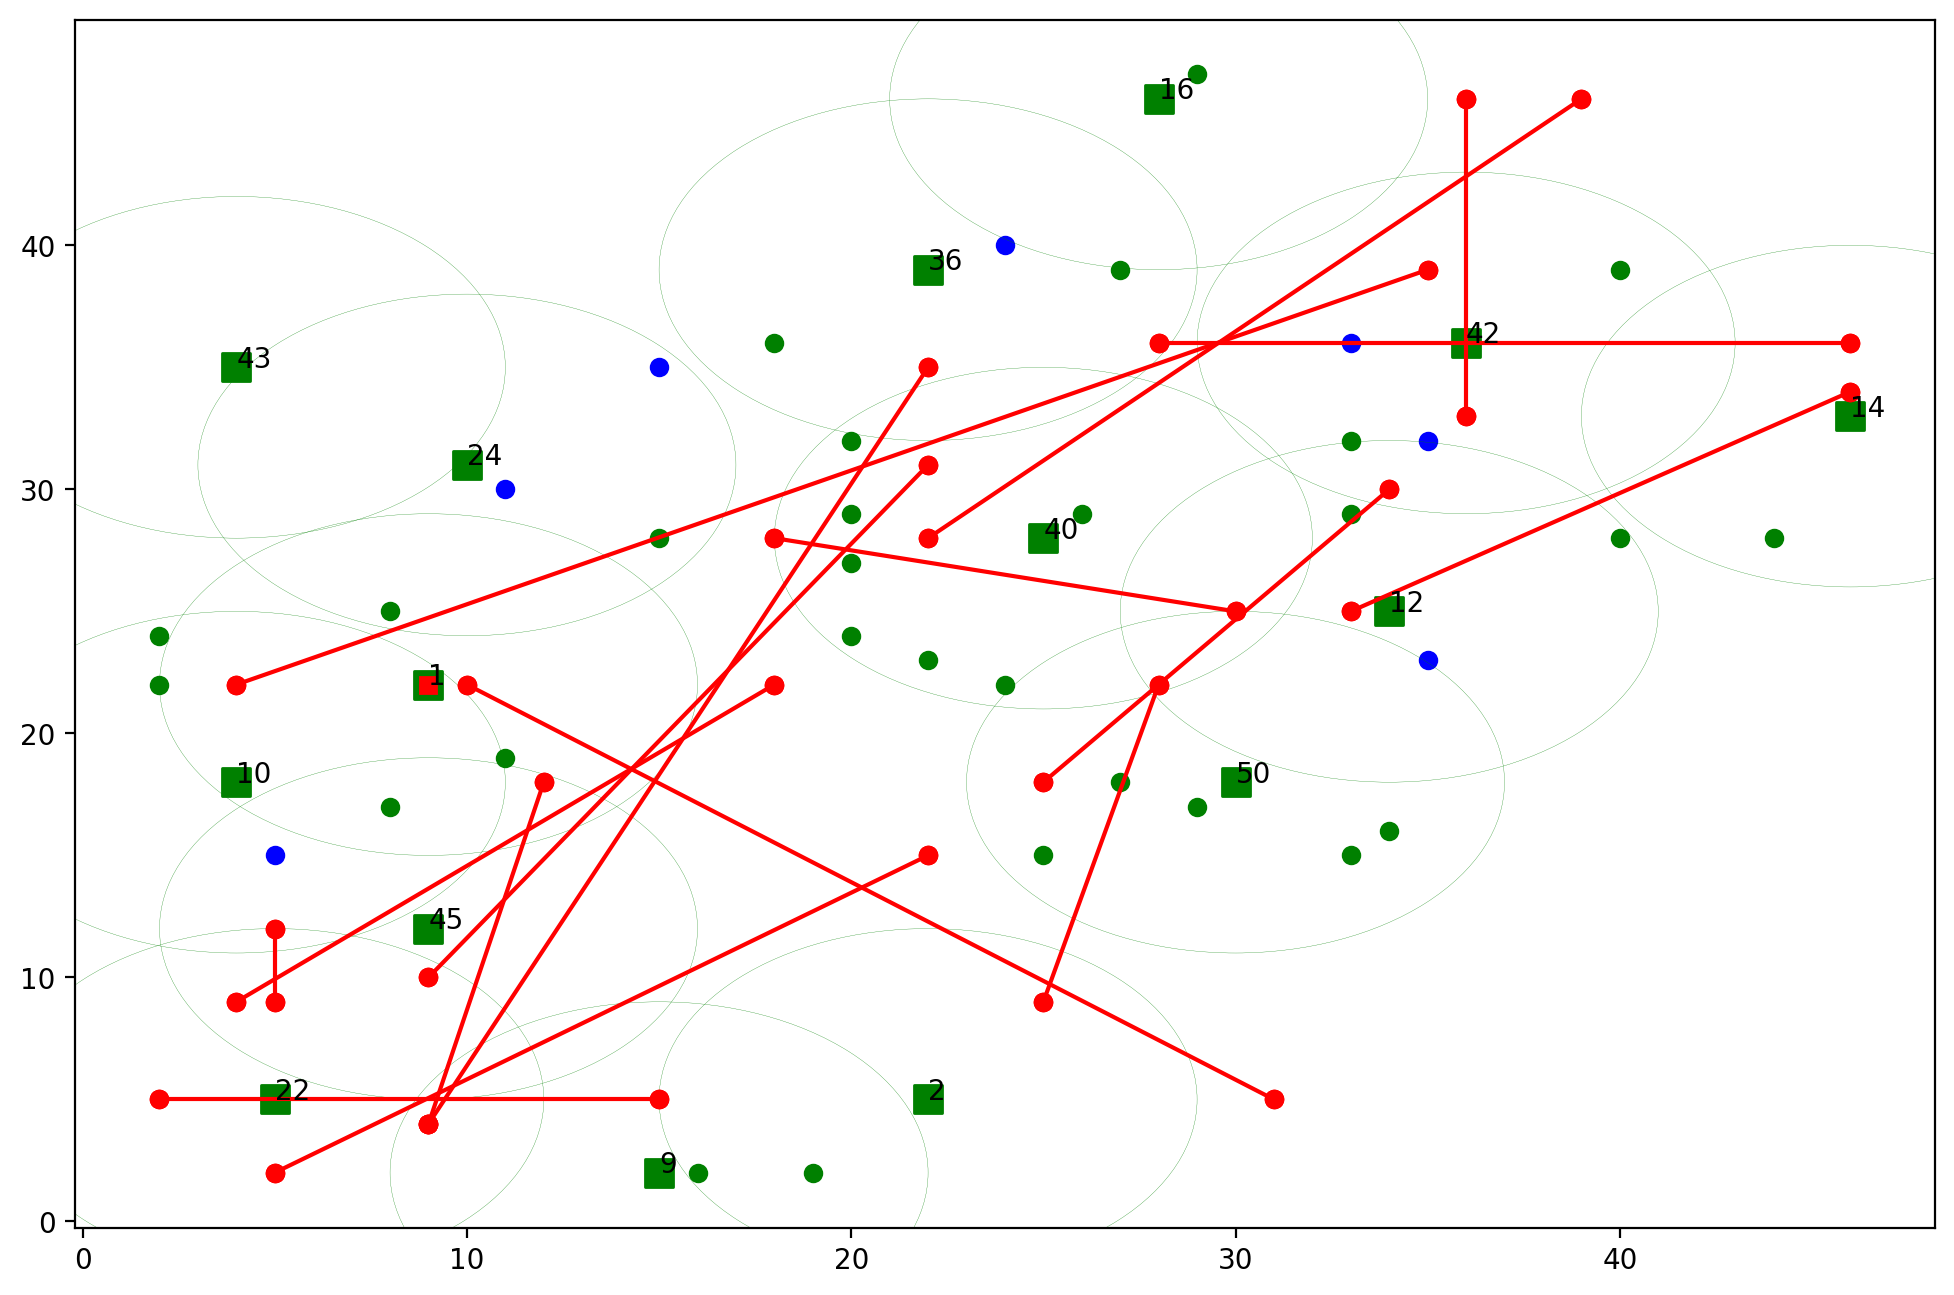

In [24]:
plot.get_figure()